In [26]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\advay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\advay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df = pd.read_csv("train_set.csv")
df

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for circuit breaker captive consumption
2,85389000,lv ma pd trip unit for cvs parts of circuit breakers
3,85389000,lv na p trip unit for cvs switch parts of circuit breaker
4,85389000,lv tmd pd trip unit for cvs parts of circuitbreakers
...,...,...
23610,84713010,veav hp ids dsc gb iu for ddr g base nb pchp laptophstnnqcr
23611,84713010,pgv inspiron portable computernotebook assybasenbkiu pg meant for resale bis no
23612,84713010,xfuc acj eguuqnfinnnnnues india rmn hstnnic notebook computer not sor sale
23613,84713010,nwg latitude portable computernotebook assybaseumaiu pgbisr laptopnot


### Dataset Analysis

In [28]:
df.shape

(23615, 2)

In [29]:
len(set(df['label']))

12

In [30]:
df['label'].unique() #Unique Labels (12 Classes)

array([85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010],
      dtype=int64)

In [31]:
pd.set_option('display.max_colwidth', 1)
df['text'][0:100]

0      pdscpm gb part of panel of chiller                                             
1     nm  p economical extended rot hand parts for circuit breaker captive consumption
2     lv ma pd trip unit for cvs parts of circuit breakers                            
3     lv na p trip unit for cvs switch parts of circuit breaker                       
4     lv tmd pd trip unit for cvs parts of circuitbreakers                            
                              ...                                                     
95    rhha auxiliary switch block                                                     
96    rhnf auxiliary switch block                                                     
97    vlhf rotary handle operator                                                     
98    rva isolator module                                                             
99    sbaa actuator                                                                   
Name: text, Length: 100, dtype: object

<Figure size 576x1080 with 0 Axes>

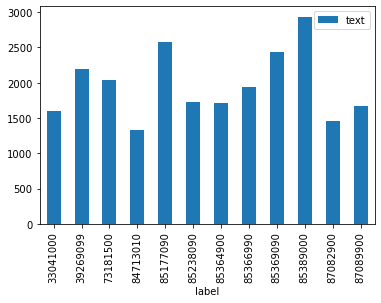

In [32]:
# Imbalance Check (freq Bar)
fig = plt.figure(figsize=(8,15))
df.groupby('label').count().plot.bar()
plt.show()

### PreProcessing: 
 Cleaing the Text and Lemmatization

In [33]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
#     text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['text'] = df['text'].apply(clean_text)


In [34]:
# Lemmatization
def lemmatization(text):
    stemmer = WordNetLemmatizer()
    text = text.split()

    text = [stemmer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text
    
df['text'] = df['text'].apply(lemmatization)   

### Vectorization and TfidfTransformation

In [35]:
vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df['text']).toarray()

In [36]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [38]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X.shape
y = df['label']  # label

In [40]:
#Split Ratio - 85(Train):15(Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [41]:
X_train.shape

(20072, 1000)

In [42]:
X_test.shape

(3543, 1000)

In [63]:
# X_train

In [43]:
#RandomForest Classifier
classifier = RandomForestClassifier(n_estimators=50, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50, random_state=0)

### Prediction

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[257   0   0   0   0   0   0   0   0   0   0   0]
 [  1 304   8   1   5   0   0   2   6  13   2   8]
 [  1  18 255   0   4   0   0   2   2   1   1   2]
 [  0   4   0 182   0   0   0   0   0   1   0   0]
 [  0   6   0   0 355   0   0   0   1   4   0   0]
 [  0   3   0   0   0 224   0   0   1   0   0   0]
 [  0   1   0   0   0   0 259   0   5   0   0   0]
 [  0  16   1   0   0   0   6 246  13   8   0   0]
 [  0  15   3   0   3   0   9  12 330  11   0   1]
 [  0  28   2   1   1   2   1   6  10 411   0   1]
 [  0   9   0   0   0   0   0   0   0   1 199  14]
 [  0  14   1   0   0   0   1   3   1   3  13 208]]
              precision    recall  f1-score   support

    33041000       0.99      1.00      1.00       257
    39269099       0.73      0.87      0.79       350
    73181500       0.94      0.89      0.92       286
    84713010       0.99      0.97      0.98       187
    85177090       0.96      0.97      0.97       366
    85238090       0.99      0.98      0.99       228
    8536

### Using Other Models

In [68]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [69]:
y_pred = svc.predict(X_test)

In [70]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[257   0   0   0   0   0   0   0   0   0   0   0]
 [  1 302   5   0   3   0   0   4   8  13   4  10]
 [  1  16 256   0   4   0   0   0   3   3   1   2]
 [  0   2   0 184   0   0   0   0   0   1   0   0]
 [  0   8   2   0 352   0   0   0   1   3   0   0]
 [  0   2   0   0   0 225   0   1   0   0   0   0]
 [  0   1   0   0   0   0 254   0   8   1   1   0]
 [  0   9   3   0   1   0   0 240  25  12   0   0]
 [  0  13   8   0   2   0  10  27 307  15   0   2]
 [  0  18   4   0   2   0   0   9  23 404   2   1]
 [  0   6   1   0   0   0   0   0   2   1 196  17]
 [  0  12   1   0   0   0   0   1   4   4  16 206]]
              precision    recall  f1-score   support

    33041000       0.99      1.00      1.00       257
    39269099       0.78      0.86      0.82       350
    73181500       0.91      0.90      0.90       286
    84713010       1.00      0.98      0.99       187
    85177090       0.97      0.96      0.96       366
    85238090       1.00      0.99      0.99       228
    8536

### Comparision with Other Model and Cross-Validation

In [72]:
models = [
    RandomForestClassifier(n_estimators=50, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='sag'),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

#### Visualizing Mean Accuracy and their Standard Deviation

In [74]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.870040,0.011178
LogisticRegression,0.866229,0.014731
MultinomialNB,0.833623,0.016996
RandomForestClassifier,0.886809,0.013047


Text(0.5, 1.0, 'MEAN ACCURACY (cv = 5)\n')

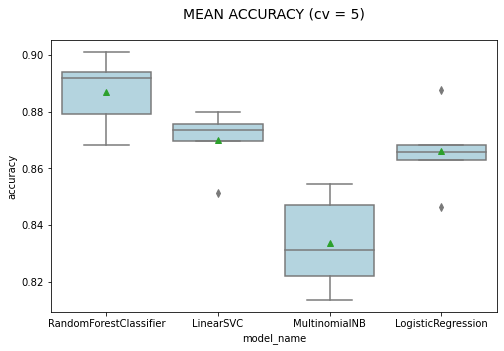

In [75]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14)

Linear SVM and Logistic Regression model are having low standard deviation for Accuracy,  
but the best accuracy is still achieved by Random Forest Classifier

##### Training Best Model on Whole Test Dataset

In [54]:
#best model
model = RandomForestClassifier(n_estimators=50, random_state=0)
model.fit(X, y)
y_pred = model.predict(X_test)

In [55]:
print('\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred))  # Training Acc

		CLASSIFICATIION METRICS

              precision    recall  f1-score   support

    33041000       1.00      1.00      1.00       257
    39269099       0.85      0.97      0.91       350
    73181500       0.99      0.94      0.96       286
    84713010       1.00      0.98      0.99       187
    85177090       0.99      0.98      0.99       366
    85238090       1.00      1.00      1.00       228
    85364900       1.00      0.98      0.99       265
    85366990       0.98      0.93      0.96       290
    85369090       0.96      0.97      0.96       384
    85389000       0.98      0.97      0.97       463
    87082900       0.97      0.95      0.96       223
    87089900       0.97      0.95      0.96       244

    accuracy                           0.97      3543
   macro avg       0.97      0.97      0.97      3543
weighted avg       0.97      0.97      0.97      3543



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=df['label'].values, 
            yticklabels=df['label'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RandomForest\n", size=16);

In [56]:
# Preprocessing for Test Dataset
def preprocessing(df):
    df['text'] = df['text'].apply(clean_text)
    df['text'] = df['text'].apply(lemmatization)
    vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
    X = vectorizer.fit_transform(df['text']).toarray()
    tfidfconverter = TfidfTransformer()
    X = tfidfconverter.fit_transform(X).toarray()
    return X
    

##### Prediction on Test Dataset by Random Forest Classifier

In [57]:
test_df = pd.read_csv('test_set.csv')
test_data = preprocessing(test_df)

test_label_pred = model.predict(test_data)
prediction = pd.DataFrame(test_label_pred, columns=['predicted_label']).to_csv('prediction.csv')